In [212]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [213]:
data = pd.read_csv("./train.csv")
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data = data.T
Ytrain = data[0]
Xtrain = data[1:n]
Xtrain = Xtrain / 255.0

test_data = pd.read_csv("./test.csv")
test_data = np.array(test_data)
test_data=test_data.T
Ytest = test_data[0]
Xtest = test_data[1:n]
Xtest = Xtest / 255.0

In [214]:
def RELU(Z):
    return np.maximum(Z, 0)

def dRELU(Z):
    return Z > 0

def softmax(Z):
    Z -= np.max(Z, axis=0)
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [215]:
def initparam(X):
    m,n = X.shape
    W1 = np.random.rand(10, m) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def fpass(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = RELU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def onehot(Y):
    ohY = np.zeros((Y.size, Y.max() + 1))
    ohY[np.arange(Y.size), Y] = 1
    ohY = ohY.T
    return ohY

In [216]:
def bpass(Z1, A1, Z2, A2, W1, W2, X, Y):
    ohY = onehot(Y)
    dZ2 = A2 - ohY
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * dRELU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def updateparam(W1, b1, W2, b2, dW1, db1, dW2, db2, lr):
    W1 = W1 - lr * dW1
    b1 = b1 - lr * db1    
    W2 = W2 - lr * dW2  
    b2 = b2 - lr * db2    
    return W1, b1, W2, b2

def predict(Z):
    return np.argmax(Z, 0)

def accuracy(preds, Y):
    return np.sum(preds == Y) / Y.size

def cost(A2, ohY):
    m = A2.shape[1]
    c = -1 / m * np.sum(ohY * np.log(A2 + 1e-8))
    return c

In [217]:
def train(X, Y, lr, itr):
    W1, b1, W2, b2 = initparam(X)
    cost_hist=[]
    for i in range(itr+1):
        Z1, A1, Z2, A2 = fpass(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = bpass(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = updateparam(W1, b1, W2, b2, dW1, db1, dW2, db2, lr)
        
        cost_hist.append(cost(A2,onehot(Y)))
        
        if i % 50 == 0:
            print("Iteration: ", i)
            preds = predict(A2)
            print(f"accuracy: {accuracy(preds, Y)}")
                 
    return W1, b1, W2, b2, cost_hist

def test(W1, b1, W2, b2, X, Y):
    Z1, A1, Z2, A2 = fpass(W1, b1, W2, b2, X)
    preds = predict(A2)
    print(f"accuracy: {accuracy(preds, Y)}")

In [218]:
W1, b1, W2, b2, costs = train(Xtrain, Ytrain, 0.1, 300)

Iteration:  0
accuracy: 0.11473333333333334
Iteration:  50
accuracy: 0.53055
Iteration:  100
accuracy: 0.5928333333333333
Iteration:  150
accuracy: 0.6465
Iteration:  200
accuracy: 0.6757666666666666
Iteration:  250
accuracy: 0.6766333333333333
Iteration:  300
accuracy: 0.6983833333333334


accuracy: 0.6997


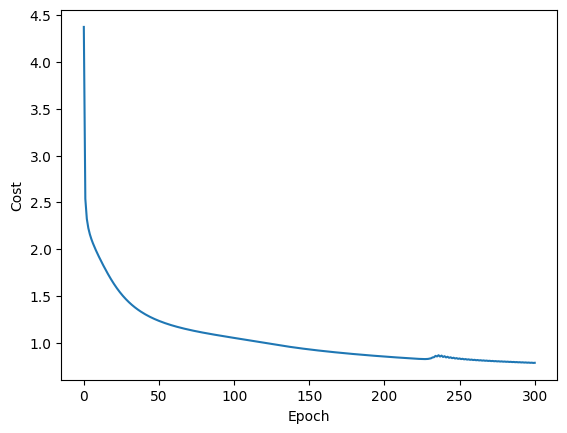

In [219]:
test(W1, b1, W2, b2, Xtest, Ytest)

plt.plot(range(len(costs)), costs)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()